In [1]:
import musclebeachtools as mbt
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import pandas as pd
import eccojams as eco

<img src="../eccojams_text_logo.png" style="width:700px;height:209px;margin-left:auto;margin-right:auto;"/>

<div style="background-color:lightblue;color:black;padding:20px;font-family:verdana;">
  <p>In this notebook I'll introduce you to some common usages of the key functions in <i>Eccojams</i>.</p>
  <p>A typical use case would be to employ these functions for processing and analysis of neuron class object data as produced with the <i>musclebeachtools</i> package (<a href="https://github.com/hengenlab/musclebeachtools_hlab">see here</a>).</p>
   <p>I've also included some example data in the same folder as this notebook.</p>
</div> 

<h2 style="font-family:verdana">Load data from numpy file.</h2>

In [2]:
neurons = np.load('example_data/example_singleunits.npy',allow_pickle=True)

In [3]:
eco.nrnlistinfo(neurons)

There are 15 neurons  in this file.
Recording is  11.92 hours  long. 
These neurons are from the following animal(s):
['CAF82']
These neurons are in the following region(s):
['CA1' 'RSC']
These neurons are under the following conditions(s):
['WT']


<h2 style="font-family:verdana;">Subset neuron list by different criteria.</h2>

In [4]:
nrns_q1 = eco.nrnlist_by_quality(neurons,[1])

In [5]:
nrns_ca1 = eco.nrnlist_by_region(neurons,'CA1')

In [6]:
nrns_caf82 = eco.nrnlist_by_animal(neurons,'CA1')

In [7]:
nrns_wt = eco.nrnlist_by_genotype(neurons,'WT')

In [8]:
nrns_ca1_rsu = eco.nrnlist_by_celltype(nrns_ca1,'RSU')

<h2 style="font-family:verdana">Check quality statistics for all neurons in list.</h2>

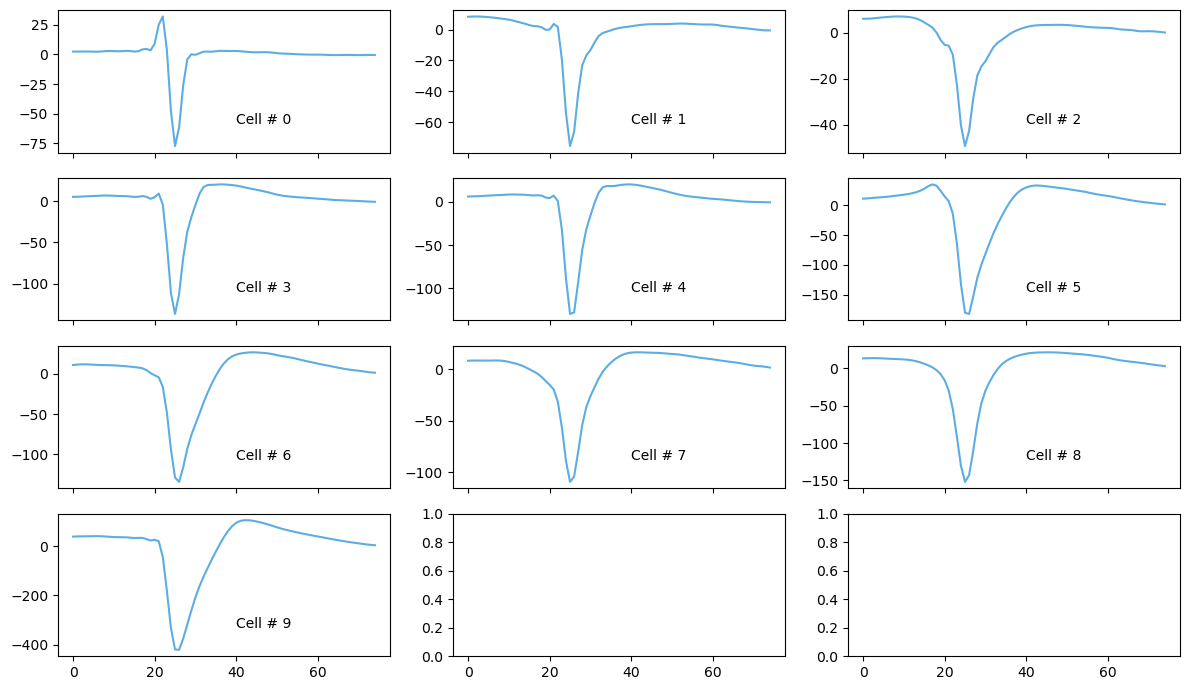

In [9]:
eco.check_wfs(nrns_ca1_rsu)

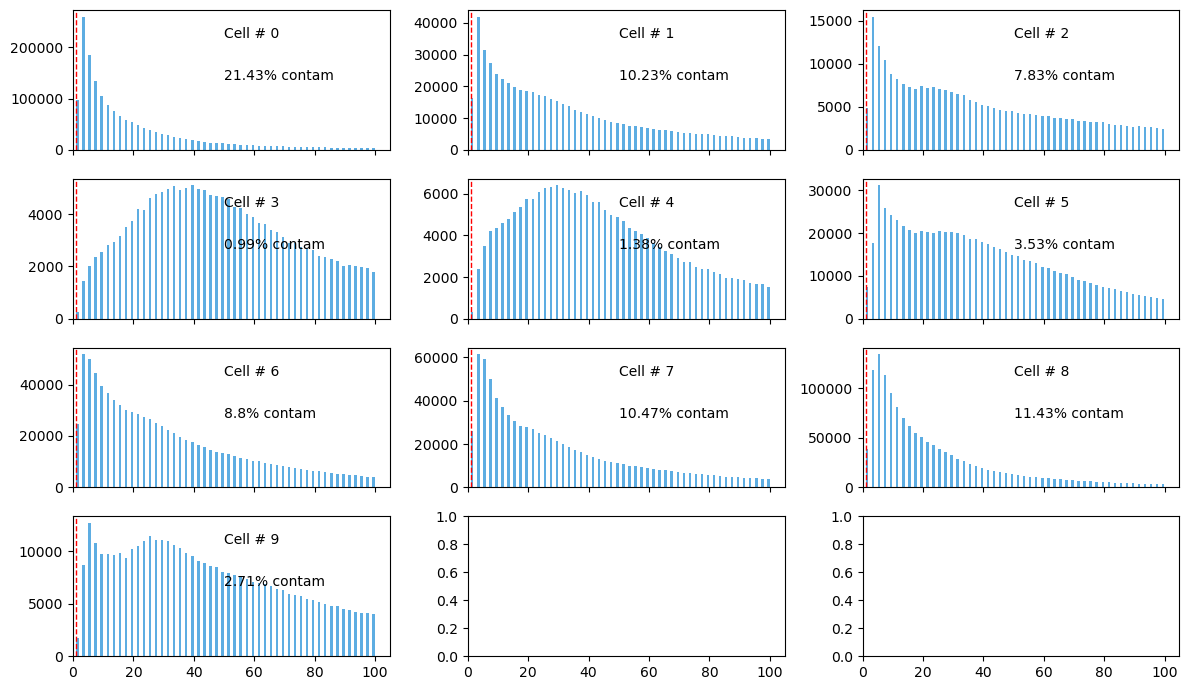

In [10]:
eco.check_isi(nrns_ca1_rsu)

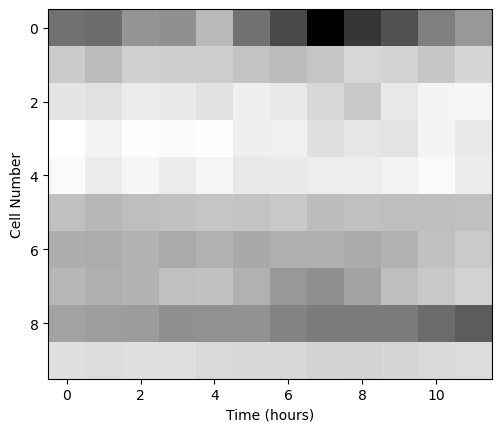

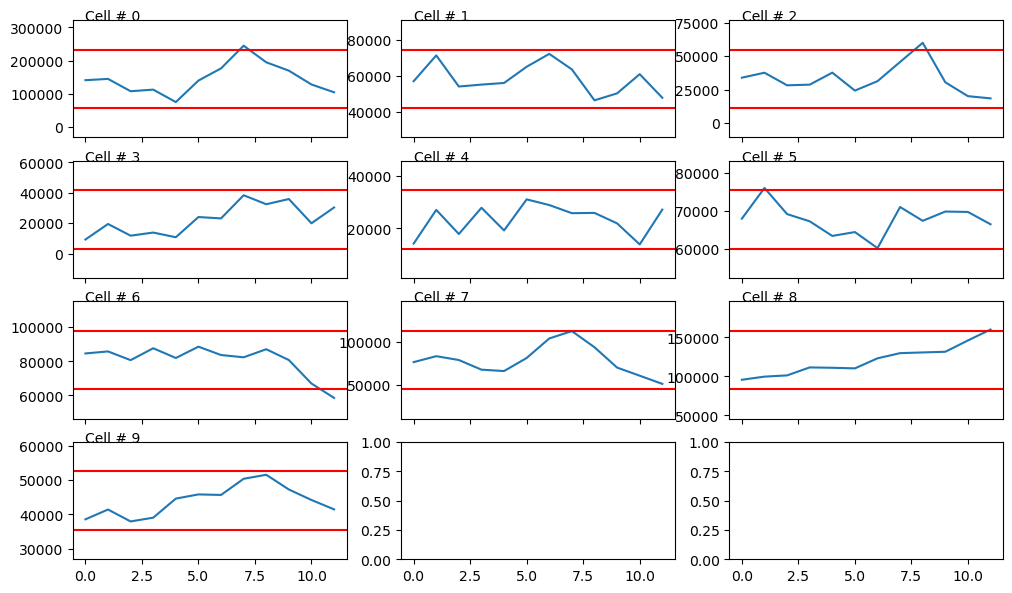

In [11]:
eco.check_continuity(nrns_ca1_rsu)

<h2 style="font-family:verdana">Plot activity of selected neurons.</h2>

/Users/sbrunwas/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py:365: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spikeraster = np.asarray(spike_timestamps)
/Users/sbrunwas/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py:393: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_yticks(np.arange(len(cellstoplot)),celllabels)


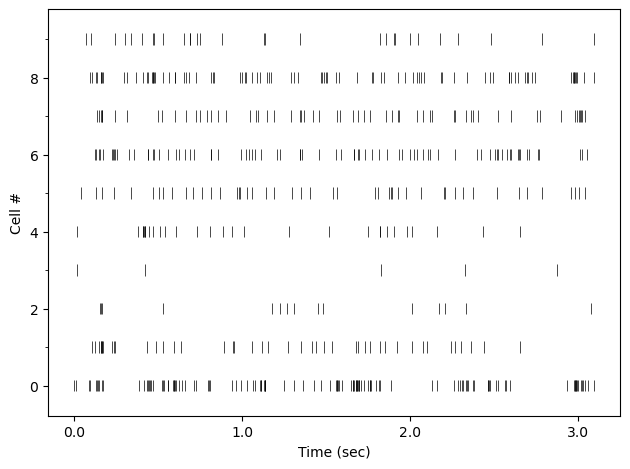

In [12]:
eco.plot_raster(nrns_ca1_rsu,starttime=0,endtime=3.1)

<h4 style="font-family:verdana">Bin spike data.</h4>

In [13]:
nrn_binned = eco.bin_spikes(nrns_ca1_rsu, binsize=1)

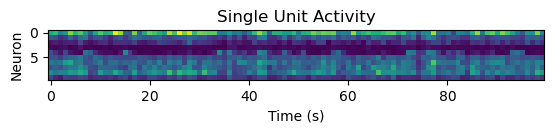

In [14]:
plt.imshow(nrn_binned[:,:100])
plt.xlabel('Time (s)')
plt.ylabel('Neuron')
plt.title('Single Unit Activity')
plt.show()

<h4 style="font-family:verdana">Shuffle binned data.</h4>

In [15]:
eco.shuffle_binned_data?

Signature: eco.shuffle_binned_data(binned_data, randmethod=3, plotdata=0)
Docstring:
####METHODS########
# 1 - random shuffled
# 2 - random shuffled, boostrapped
# 3 - random poisson FR (statistically matched)
# 4 - random poisson FR (statistically matched), boostrapped
# 5 - random shift
# 6 - random shift, bootstrapped
File:      ~/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py
Type:      function


In [16]:
nrns_shuffled = eco.shuffle_binned_data(nrn_binned,randmethod=5)

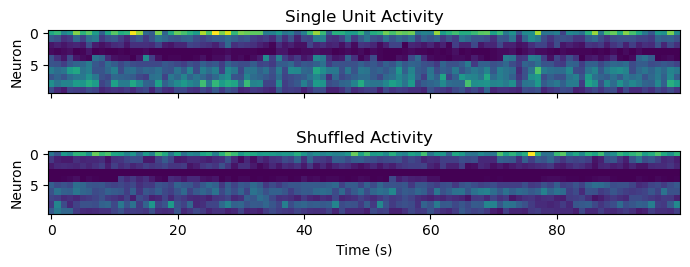

In [17]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(7,3))
ax[0].imshow(nrn_binned[:,:100])
ax[0].set_ylabel('Neuron')
ax[0].set_title('Single Unit Activity')
ax[1].imshow(nrns_shuffled[:,:100])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Neuron')
ax[1].set_title('Shuffled Activity')
plt.tight_layout()
plt.show()

<h4 style="font-family:verdana">Generate synthetic spike train.</h4>

In [18]:
from scipy.signal import square

In [19]:
prob_sin = np.sin(0.15*np.arange(1000))
spikes_sin = eco.spiketrain_from_probability(prob_sin)

In [20]:
prob_square = square(np.arange(1000), duty=0.5)
spikes_square = eco.spiketrain_from_probability(prob_square)

In [21]:
prob_complex = np.add(3*np.sin(0.05*np.arange(1000)),square(np.arange(1000), duty=0.5))
spikes_complex = eco.spiketrain_from_probability(prob_complex)

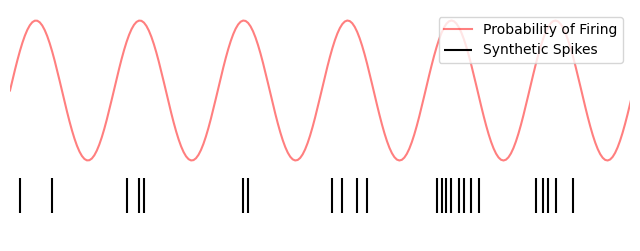

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_sin,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_sin,color='black',lineoffsets = -1.5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,250)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

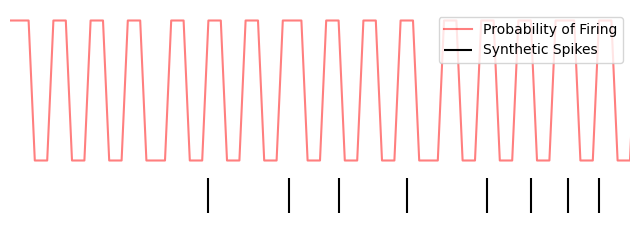

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_square,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_square,color='black',lineoffsets = -1.5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,100)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

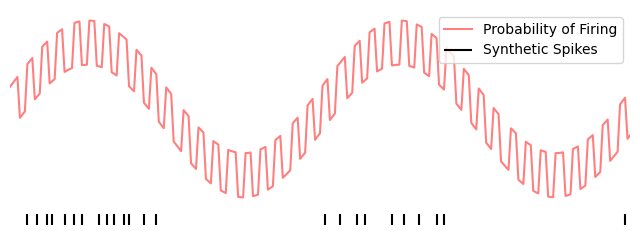

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_complex,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_complex,color='black',lineoffsets = -5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,250)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

<h2 style="font-family:verdana">Load sleep and event data.</h2>

<h4 style="font-family:verdana">Dealing with lists of files.</4>

In [25]:
filelist = ['file1','file2','file10']

In [26]:
np.sort(filelist)

array(['file1', 'file10', 'file2'], dtype='<U6')

In [27]:
eco.natural_sort(filelist)

['file1', 'file2', 'file10']

In [28]:
rawfiles = eco.load_txt_as_list('example_data/files.txt')

In [29]:
rawfiles[:5]

['/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-50-00.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-55-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-00-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-05-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-10-01.bin']

In [30]:
file1 = rawfiles[1]
file2 = rawfiles[2]
print(file1)
print(file2)

/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-55-01.bin
/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-00-01.bin


In [31]:
timestamp1 = eco.binfile_to_timestamp(file1)
timestamp2 = eco.binfile_to_timestamp(file2)
print(timestamp1)
print(timestamp2)

2021-03-04_12-55-01
2021-03-04_13-00-01


In [32]:
eco.dtify(timestamp1)

datetime.datetime(2021, 3, 4, 12, 55, 1)

<i><b>How many seconds elapsed between the files?</b></i>

In [33]:
(eco.dtify(timestamp2) - eco.dtify(timestamp1)).seconds

300

<h4 style="font-family:verdana">Working with sleep states.</4>

In [34]:
sleepfiles = glob.glob('example_data/*sleep.npy')

In [35]:
sleepdf = eco.return_sleepdf(sleepfiles)

In [36]:
sleepdf.head()

,start_time,stop_time,sleepstate
0,0.0,252.0,2.0
1,252.0,332.0,3.0
2,332.0,1004.0,2.0
3,1004.0,1060.0,3.0
4,1060.0,1924.0,2.0


<h4 style="font-family:verdana">Load event times (e.g. sharp wave ripples).</4>

In [37]:
ripple_csv = glob.glob('example_data/ripple*.csv')[0]
rippledf = eco.get_riptimes(ripple_csv, peakdist = 0.1, ampthresh = 50)

In [38]:
rippledf.head()

,ripple_number,start_time,end_time,length,amplitude,file,sec_elapsed,peak_time
46,47,199.833333,199.862667,0.029333,54.517255,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,0,199.848000
78,79,257.452000,257.501333,0.049333,55.601663,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,0,257.476667
107,108,329.640000,329.707333,0.067333,60.730414,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,329.673667
108,109,340.895333,340.964000,0.068667,58.237573,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,340.929667
109,110,342.218000,342.266000,0.048000,123.454318,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,342.242000


<h4 style="font-family:verdana">Select event times that occur within a single sleep state.</h4>

In [39]:
ripples_nrem = eco.riptimes_by_state(rippledf, sleepdf, 'nrem')

In [40]:
len(rippledf), len(ripples_nrem)

(19129, 11700)

<h2 style="font-family:verdana">Align and analyze spike data around events.</h2>

<h4 style="font-family:verdana">Set binsize and peri-event window size.  Define plotting function. </h4>

In [41]:
binsize=0.001
peri_rip_time = 0.5

def plot_peth(pethdat,peri_rip_time):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,2))
    for i in np.arange(pethdat.shape[0]):
        ax.plot(pethdat[i,:])
        
    xticklabs = np.round(np.hstack([np.arange(-0.4,0,0.2),
                                np.arange(0,0.41,0.2)]),2)
    xtickpos = (xticklabs + peri_rip_time) * 1000
    ax.set_xticks(xtickpos)
    ax.set_xticklabels(xticklabs,rotation=0,fontsize=12)
    ax.set_xlabel('Time from Event (s)',fontsize=14)

<h4 style="font-family:verdana">Align spikes around an event.</h4>

In [42]:
peth = eco.bin_and_align_spikes(nrns_ca1_rsu, ripples_nrem.peak_time[:100],
                                   binsize, peri_rip_time)

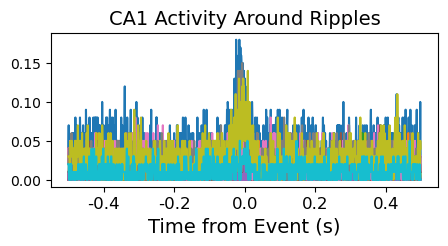

In [43]:
plot_peth(np.mean(peth,axis=2),peri_rip_time)
plt.title('CA1 Activity Around Ripples',fontsize=14)
plt.show()

<h4 style="font-family:verdana">Gaussian smoothing of peri-event histograms.</h4>

In [44]:
peth_smoothed = eco.smooth_spikes(np.mean(peth,axis=2), binsize, sigma=0.005)

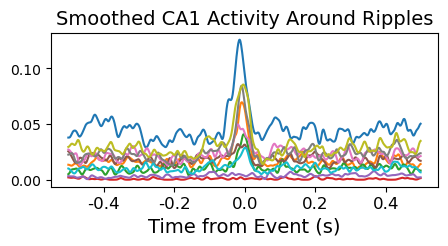

In [45]:
plot_peth(peth_smoothed,peri_rip_time)
plt.title('Smoothed CA1 Activity Around Ripples',fontsize=14)
plt.show()

<h4 style="font-family:verdana">Z score activity in peri-event histograms.</h4>

In [46]:
baseline = int((20/1e3)/ binsize) #use 20 ms of each flank as baseline
peth_z = eco.zscore_to_flank(peth_smoothed, baseline_length = baseline)

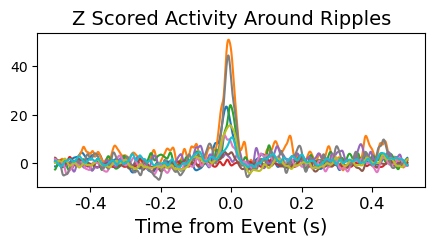

In [47]:
plot_peth(peth_z,peri_rip_time)
plt.title('Z Scored Activity Around Ripples',fontsize=14)
plt.show()

<h2 style="font-family:verdana">Examine population statistics in spike data.</h2>

<h4 style="font-family:verdana">Cross-correlogram between neuron pairs.</h4>

	Using 3000 segments.


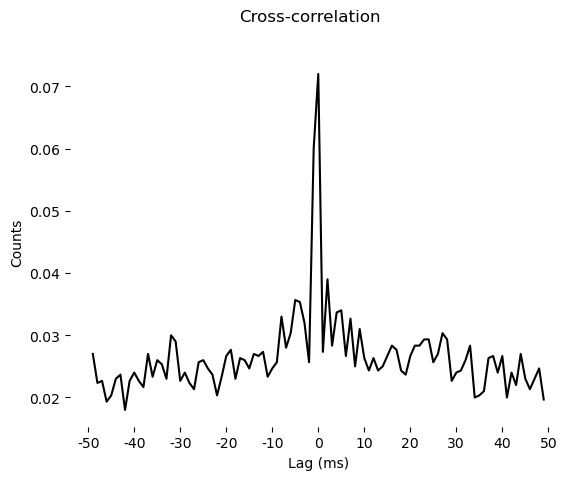

In [48]:
eco.ccg_pair(nrns_ca1_rsu[8],nrns_ca1_rsu[7])

<h4 style="font-family:verdana">Cross-correlogram between spike trains.</h4>

In [49]:
lag = 0.02
spikes_zerolag = eco.generate_random_spikes(nspikes=500, tspan=10, poisson_prob=1)
spikes_lagged = eco.shuffle_spikes(spikes_zerolag + lag, jitter_size=3) #jitter the spikes a little

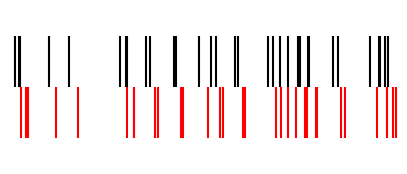

In [50]:
fig,ax = plt.subplots(figsize=(5,2))
ax.eventplot(spikes_zerolag,color='black',lineoffset=1,linelength=0.5)
ax.eventplot(spikes_lagged,color='red',lineoffset=0.5,linelength=0.5)
ax.set_ylim(0,1.5)
ax.set_xlim(0,1)
ax.axis('off')
plt.show()

	Using 10000 segments.


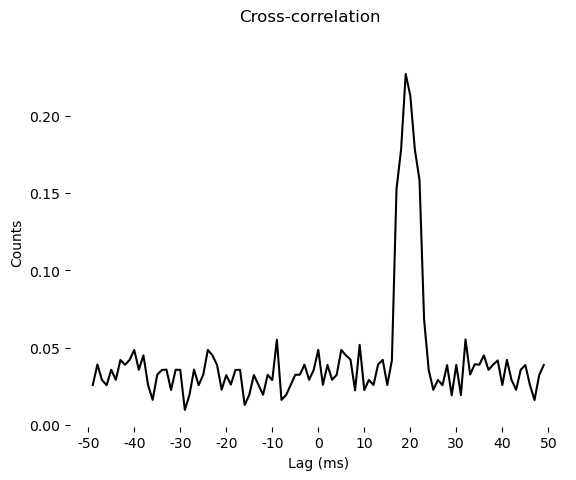

In [51]:
eco.ccg_tseries(spikes_zerolag,spikes_lagged,dt=1e-3,tspan=0.05,nsegs=10000)

<h4 style="font-family:verdana">Exploring low-dimensional structure, or "manifolds" if you dare...</h4>

In [52]:
transformed_pca, explvar = eco.pca_on_data(peth_z,scaling=1)

<h5 style="font-family:verdana">How many principal components are needed to reach 90% explained variance?</h5>

In [53]:
cumulative_explvar = np.cumsum(explvar)
dimensionality = eco.calc_dim_from_curve(cumulative_explvar,maxval=1,target=0.9)
print(dimensionality)

4.639408067081309


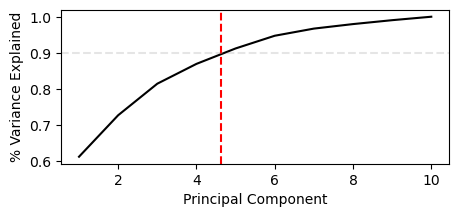

In [54]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,2))
ax.plot(np.arange(1,11),cumulative_explvar,color='black')
ax.axvline(dimensionality,color='red',linestyle='--')
ax.axhline(0.9,color='grey',linestyle='--',alpha=0.2)
ax.set_ylabel('% Variance Explained')
ax.set_xlabel('Principal Component')
plt.show()

<h5 style="font-family:verdana">PCA-transformed data</h5>

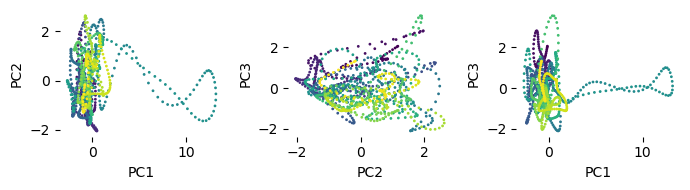

In [55]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(7,2))
colors = np.linspace(0,1,1000)
for c,comps in enumerate([(0,1),(1,2),(0,2)]):
    ax[c].scatter(transformed_pca[:,comps[0]],transformed_pca[:,comps[1]],c=colors,s=1)
    ax[c].set_xlabel(f'PC{comps[0]+1}')
    ax[c].set_ylabel(f'PC{comps[1]+1}')
    for frame in ['top','right','bottom','left']:
        ax[c].spines[frame].set_visible(False)
plt.tight_layout()
plt.show()

<h5 style="font-family:verdana">Factor Analysis-transformed data</h5>

In [56]:
transformed_fa, explvar = eco.factoranalysis_on_data(peth_z,scaling=1)

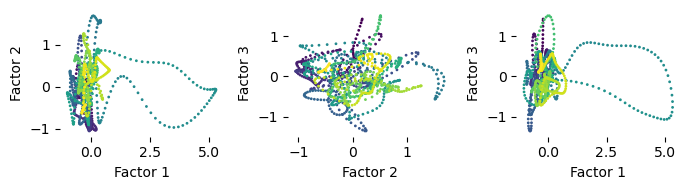

In [57]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(7,2))
colors = np.linspace(0,1,1000)
for c,comps in enumerate([(0,1),(1,2),(0,2)]):
    ax[c].scatter(transformed_fa[:,comps[0]],transformed_fa[:,comps[1]],c=colors,s=1)
    ax[c].set_xlabel(f'Factor {comps[0]+1}')
    ax[c].set_ylabel(f'Factor {comps[1]+1}')
    for frame in ['top','right','bottom','left']:
        ax[c].spines[frame].set_visible(False)
plt.tight_layout()
plt.show()

<h5 style="font-family:verdana">Isomap-transformed data</h5>

In [58]:
transformed_iso = eco.isomap_on_data(peth_z,scaling=1,n_comp=5)

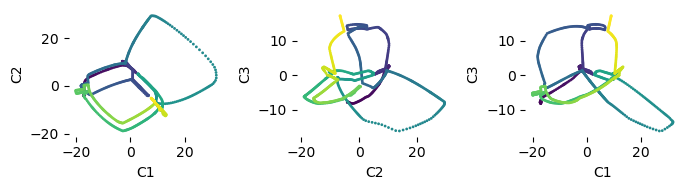

In [59]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(7,2))
colors = np.linspace(0,1,1000)
for c,comps in enumerate([(0,1),(1,2),(0,2)]):
    ax[c].scatter(transformed_iso[:,comps[0]],transformed_iso[:,comps[1]],c=colors,s=1)
    ax[c].set_xlabel(f'C{comps[0]+1}')
    ax[c].set_ylabel(f'C{comps[1]+1}')
    for frame in ['top','right','bottom','left']:
        ax[c].spines[frame].set_visible(False)
plt.tight_layout()
plt.show()

<h4 style="font-family:verdana">Measure interactions between brain regions with Canonical Correlation Analysis.</h4>

In [60]:
nrn_ca1 = eco.bin_spikes(eco.nrnlist_by_region(neurons,'CA1'),binsize=1)
nrn_rsc = eco.bin_spikes(eco.nrnlist_by_region(neurons,'RSC'),binsize=1)

In [61]:
X_c, Y_c = eco.cca_on_data(nrn_ca1,nrn_rsc)

In [62]:
#Canonical correlation of the first canonical covariates
np.corrcoef(X_c[:,0],Y_c[:,0])[0,1]

0.7180045424294391

In [63]:
#Canonical correlation of the second canonical covariates
np.corrcoef(X_c[:,1],Y_c[:,1])[0,1]

0.49442351812341406